# This program is used to run DS simulation to fill radar line gaps with sampled TIs

Sep. 2, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.DS_sim import *
%config InlineBackend.figure_format='retina'

# DS

## Load data

Load radar line data (hard data)

In [2]:
# read hard data
LineData = np.load('data/LineData.npy')
LineBloc_space = np.load('data/DemoBloc_space.npy')

Load all the 166 TIs

In [3]:
# input the TI candidate
TI_Amount = 166
TI_Height = 200
TI_Width = 200
LowerBound = -9998
TrainingImages = np.loadtxt(fname='data/TI_Standardization_166.txt',dtype=float,delimiter=',')
TrainingImages = TrainingImages.reshape((TI_Amount, TI_Height, TI_Width))
TrainingImages[TrainingImages==-9999] = np.nan

Load sampled posterior TIs

In [4]:
# Load sampled posterior TIs
DS_realnum = 1
TIAssignment_Matrix = np.load('data/PosteriorSampled_TIs.npy')[:,DS_realnum]
TIAssignment_Matrix = TIAssignment_Matrix.reshape(TIAssignment_Matrix.shape[0],1)

## Run DS simulation with sampled TIs

The indices of selected TIs are [107] for block 0


100%|██████████| 45800/45800 [00:51<00:00, 881.12it/s] 


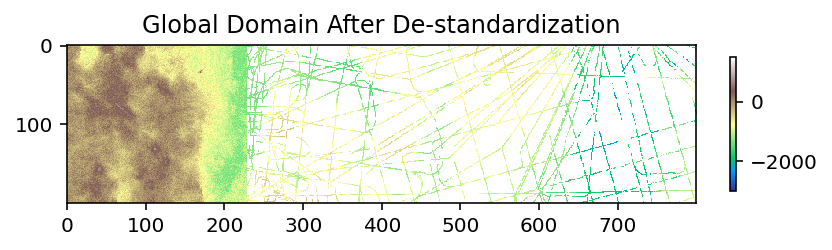

The indices of selected TIs are [109] for block 1


100%|██████████| 51800/51800 [00:47<00:00, 1099.38it/s]


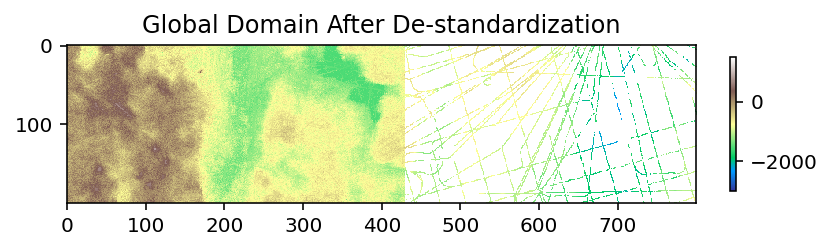

The indices of selected TIs are [109] for block 2


100%|██████████| 51800/51800 [00:52<00:00, 981.49it/s] 


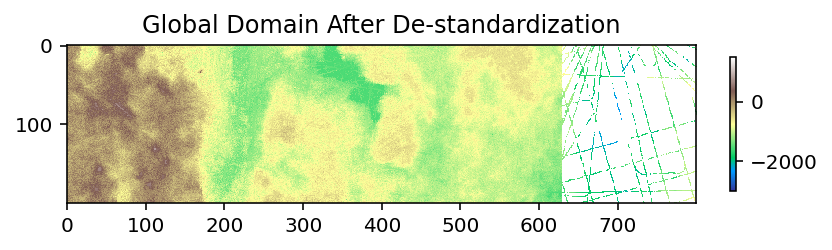

The indices of selected TIs are [24] for block 3


100%|██████████| 46000/46000 [00:54<00:00, 844.43it/s] 


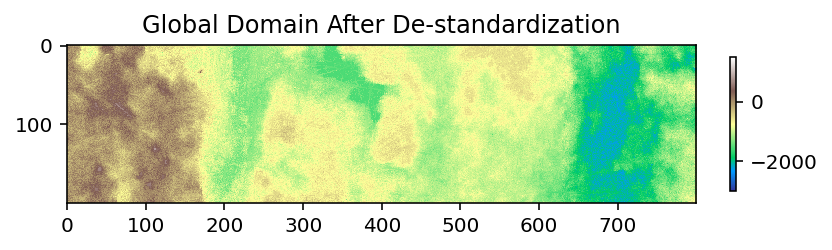

Runing time is 0.058 hrs


In [5]:
DS_sim_global = DS_global(SimulationGrid = np.copy(LineData), 
                          LineBloc_space = LineBloc_space, 
                          CandidateTI = np.copy(TrainingImages), 
                          TIAssignment_Matrix = np.copy(TIAssignment_Matrix), 
                          DS_Neighbors = 30, 
                          DS_SearchingRadius = 20, 
                          DS_DistanceThreshold = 0.1,
                          TI_SearchFraction = 0.10,
                          padding_radius = 30,
                          save_dir='results/', start_block = 0)